# Yelp API - Lab


## Introduction 

Now that we've seen how the Yelp API works and some basic Folium visualizations, it's time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you but make the request below.

In [1]:
# Your code here
import json
import requests

def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
keys = get_keys("/Users/zazue/.secret/yelp_api.json")
api_key = keys['api_key']

term = 'Italian'
location = 'Brooklyn'

url = 'https://api.yelp.com/v3/businesses/search'

headers = {'Authorization': 'Bearer {}'.format(api_key)}
url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+')
            }
response = requests.get(url, headers=headers, params=url_params)

print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "qgY41g_eg0eNzewCXmKcaA", "alias": "lillo-cucina-italiana-brooklyn", "name": "Lillo Cucina Italiana", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/b2MP6R0g_sfFpnLRnQSduA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/lillo-cucina-italiana-brooklyn?adjust_creative=BSYNmtcPXZaz0W3VSZ1apA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=BSYNmtcPXZaz0W3VSZ1apA", "review_count": 108, "categories": [{"alias": "cafes", "title": "Cafes"}, {"alias": "italian", "title": "Italian"}], "rating": 5.0, "coordinates": {"latitude": 40.69023, "longitude": -73.99634}, "transactions": [], "price": "$$", "location": {"address1": "331 Henry St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11201", "country": "US", "state": "NY", "display_address": ["331 Henry St", "Brooklyn, NY 11201"]}, "phone": "+13477630899", "display_phone": "(347) 763-0899", "distance": 6392.460698962309}, {"id": "5Do

## Pagination

Now that you have an initial response, you can examine the contents of the JSON container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [2]:
# Your code here; use a function or loop to retrieve all the results from your original request
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [6]:
len(response.json()['businesses'])

20

In [3]:
response.json()['total']

7900

In [78]:
response.json()['region']['center'].values()

dict_values([-73.93936157226562, 40.652330148320374])

In [4]:
response.json()['businesses'][:2]

[{'id': 'qgY41g_eg0eNzewCXmKcaA',
  'alias': 'lillo-cucina-italiana-brooklyn',
  'name': 'Lillo Cucina Italiana',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/b2MP6R0g_sfFpnLRnQSduA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/lillo-cucina-italiana-brooklyn?adjust_creative=BSYNmtcPXZaz0W3VSZ1apA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=BSYNmtcPXZaz0W3VSZ1apA',
  'review_count': 108,
  'categories': [{'alias': 'cafes', 'title': 'Cafes'},
   {'alias': 'italian', 'title': 'Italian'}],
  'rating': 5.0,
  'coordinates': {'latitude': 40.69023, 'longitude': -73.99634},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '331 Henry St',
   'address2': None,
   'address3': '',
   'city': 'Brooklyn',
   'zip_code': '11201',
   'country': 'US',
   'state': 'NY',
   'display_address': ['331 Henry St', 'Brooklyn, NY 11201']},
  'phone': '+13477630899',
  'display_phone': '(347) 763-0899',
  'distance': 6392.460698962309},
 {'

In [7]:
import pandas as pd
df = pd.DataFrame(response.json()['businesses'])
print(len(df))
print(df.columns)
df

20
Index(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id',
       'image_url', 'is_closed', 'location', 'name', 'phone', 'price',
       'rating', 'review_count', 'transactions', 'url'],
      dtype='object')


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lillo-cucina-italiana-brooklyn,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...","{'latitude': 40.69023, 'longitude': -73.99634}",(347) 763-0899,6392.460699,qgY41g_eg0eNzewCXmKcaA,https://s3-media3.fl.yelpcdn.com/bphoto/b2MP6R...,False,"{'address1': '331 Henry St', 'address2': None,...",Lillo Cucina Italiana,+13477630899,$$,5.0,108,[],https://www.yelp.com/biz/lillo-cucina-italiana...
1,aita-trattoria-crown-heights,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.6712095108944, 'longitude': -7...",(917) 966-2670,2618.950436,5DoCTugT9AF-P3VspApsyQ,https://s3-media2.fl.yelpcdn.com/bphoto/mvZ4ur...,False,"{'address1': '798A Franklin Ave', 'address2': ...",Aita Trattoria,+19179662670,$$,4.0,168,"[pickup, delivery]",https://www.yelp.com/biz/aita-trattoria-crown-...
2,camillo-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.6596, 'longitude': -73.95081}",(718) 576-6886,1260.257945,zww7OtudkcE921UT2ThOSg,https://s3-media4.fl.yelpcdn.com/bphoto/D8MX-d...,False,"{'address1': '1146 Nostrand Ave', 'address2': ...",Camillo,+17185766886,$$,4.0,118,"[pickup, delivery]",https://www.yelp.com/biz/camillo-brooklyn?adju...
3,scottadito-osteria-toscana-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 40.6746627, 'longitude': -73.9766...",(718) 636-4800,4004.838970,w0YkRy2gsr0znrM7ojZtTw,https://s3-media1.fl.yelpcdn.com/bphoto/nxMHwk...,False,"{'address1': '788A Union St', 'address2': '', ...",Scottadito Osteria Toscana,+17186364800,$$,4.0,834,"[restaurant_reservation, pickup, delivery]",https://www.yelp.com/biz/scottadito-osteria-to...
4,ammazzacaffè-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7113172, 'longitude': -73.9446...",(929) 250-2875,6574.048821,eMSTTuOUlKEnSOr8lPp3Xg,https://s3-media4.fl.yelpcdn.com/bphoto/gMgcqy...,False,"{'address1': '702 Grand St', 'address2': None,...",Ammazzacaffè,+19292502875,$$,4.5,140,"[pickup, delivery]",https://www.yelp.com/biz/ammazzacaff%C3%A8-bro...
5,piccoli-trattoria-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 40.6650986895797, 'longitude': -7...",(718) 788-0066,4219.978079,XvEz60Y0NbLxooK9AmRU8g,https://s3-media2.fl.yelpcdn.com/bphoto/zrrRQh...,False,"{'address1': '522 6th Ave', 'address2': None, ...",Piccoli Trattoria,+17187880066,$$,4.5,452,"[pickup, delivery]",https://www.yelp.com/biz/piccoli-trattoria-bro...
6,mariella-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 40.6662419, 'longitude': -73.985749}",(718) 499-2132,4207.558747,5V4cUVikPN8ALWXBVdjltw,https://s3-media4.fl.yelpcdn.com/bphoto/8x2azc...,False,"{'address1': '492 6th Ave', 'address2': '', 'a...",Mariella,+17184992132,$$,4.5,319,[pickup],https://www.yelp.com/biz/mariella-brooklyn?adj...
7,da-ciro-brooklyn-brooklyn-2,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 40.6931299, 'longitude': -73.96716}",(929) 295-9542,5109.264917,ffJddI2ICrCz6q_QWrU5VQ,https://s3-media3.fl.yelpcdn.com/bphoto/DTRwxb...,False,"{'address1': '458 Myrtle Ave', 'address2': '',...",Da Ciro Brooklyn,+19292959542,$$,4.5,84,[pickup],https://www.yelp.com/biz/da-ciro-brooklyn-broo...
8,centanni-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.6730907423467, 'longitude': -7...",(718) 942-5201,2762.423950,TO9IICJjvcg1QhLVnap9fA,https://s3-media4.fl.yelpcdn.com/bphoto/g-6Xmi...,False,"{'address1': '742 Franklin Ave', 'address2': '...",Cent'Anni,+17189425201,$$,3.5,400,"[pickup, delivery]",https://www.yelp.com/biz/centanni-brooklyn?adj...
9,saraghina-brooklyn,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 40.6835063, 'longitude': -73.9352...",(718) 574-0010,3484.344416,fU22eRTnKLT2C-OFJ6eUGQ,https://s3-media1.fl.yelpcdn.com/bphoto/91giei...,False,"{'address1': '435 Halsey St', 'address2': '', ...",Saraghina,+17185740010,$$,4.0,

In [8]:
import pandas as pd
import time

def yelp_call(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    
    df = pd.DataFrame(response.json()['businesses'])
    return df

def all_results(url_params, api_key):
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    dfs = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        dfs.append(yelp_call(url_params, api_key))
        time.sleep(1) #Wait a second
        cur += 50
    df = pd.concat(dfs, ignore_index=True)
    return df

term = 'Italian'
location = 'Brooklyn'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }
df = all_results(url_params, api_key)
print(len(df))
df.head()

7900 total matches found.
1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lillo-cucina-italiana-brooklyn,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...","{'latitude': 40.69023, 'longitude': -73.99634}",(347) 763-0899,6392.460699,qgY41g_eg0eNzewCXmKcaA,https://s3-media3.fl.yelpcdn.com/bphoto/b2MP6R...,False,"{'address1': '331 Henry St', 'address2': None,...",Lillo Cucina Italiana,+13477630899,$$,5.0,108,[],https://www.yelp.com/biz/lillo-cucina-italiana...
1,aita-trattoria-crown-heights,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.6712095108944, 'longitude': -7...",(917) 966-2670,2618.950436,5DoCTugT9AF-P3VspApsyQ,https://s3-media2.fl.yelpcdn.com/bphoto/mvZ4ur...,False,"{'address1': '798A Franklin Ave', 'address2': ...",Aita Trattoria,+19179662670,$$,4.0,168,"[delivery, pickup]",https://www.yelp.com/biz/aita-trattoria-crown-...
2,camillo-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.6596, 'longitude': -73.95081}",(718) 576-6886,1260.257945,zww7OtudkcE921UT2ThOSg,https://s3-media4.fl.yelpcdn.com/bphoto/D8MX-d...,False,"{'address1': '1146 Nostrand Ave', 'address2': ...",Camillo,+17185766886,$$,4.0,118,"[delivery, pickup]",https://www.yelp.com/biz/camillo-brooklyn?adju...
3,scottadito-osteria-toscana-brooklyn,"[{'alias': 'italian', 'title': 'Italian'}, {'a...","{'latitude': 40.6746627, 'longitude': -73.9766...",(718) 636-4800,4004.838970,w0YkRy2gsr0znrM7ojZtTw,https://s3-media1.fl.yelpcdn.com/bphoto/nxMHwk...,False,"{'address1': '788A Union St', 'address2': '', ...",Scottadito Osteria Toscana,+17186364800,$$,4.0,834,"[restaurant_reservation, delivery, pickup]",https://www.yelp.com/biz/scottadito-osteria-to...
4,ammazzacaffè-brooklyn,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'latitude': 40.7113172, 'longitude': -73.9446...",(929) 250-2875,6574.048821,eMSTTuOUlKEnSOr8lPp3Xg,https://s3-media4.fl.yelpcdn.com/bphoto/gMgcqy...,False,"{'address1': '702 Grand St', 'address2': None,...",Ammazzacaffè,+19292502875,$$,4.5,140,"[delivery, pickup]",https://www.yelp.com/biz/ammazzacaff%C3%A8-bro...


## Exploratory Analysis

Take the restaurants from the previous question and do an initial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [46]:
# Your code here
for i in ['price', 'rating', 'review_count']:
    print(i,'\n',df[i].value_counts(normalize=True).head(10),'\n\n')

price 
 $$      0.720524
$$$     0.217249
$       0.043668
$$$$    0.018559
Name: price, dtype: float64 


rating 
 4.0    0.535
4.5    0.258
3.5    0.171
5.0    0.028
3.0    0.007
2.5    0.001
Name: rating, dtype: float64 


review_count 
 79     0.007
46     0.006
110    0.006
175    0.006
190    0.005
125    0.005
70     0.005
195    0.005
22     0.005
58     0.005
Name: review_count, dtype: float64 




In [22]:
print(df.review_count.min())
print(df.review_count.max())

1
5962


In [49]:
df2 = df[['name','price', 'review_count', 'rating', 'coordinates']]
df2.head()

,name,price,review_count,rating,coordinates
0,Lillo Cucina Italiana,$$,108,5.0,"{'latitude': 40.69023, 'longitude': -73.99634}"
1,Aita Trattoria,$$,168,4.0,"{'latitude': 40.6712095108944, 'longitude': -7..."
2,Camillo,$$,118,4.0,"{'latitude': 40.6596, 'longitude': -73.95081}"
3,Scottadito Osteria Toscana,$$,834,4.0,"{'latitude': 40.6746627, 'longitude': -73.9766..."
4,Ammazzacaffè,$$,140,4.5,"{'latitude': 40.7113172, 'longitude': -73.9446..."


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
name            1000 non-null object
price           916 non-null object
review_count    1000 non-null int64
rating          1000 non-null float64
coordinates     1000 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB


In [51]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 999
Data columns (total 5 columns):
name            916 non-null object
price           916 non-null object
review_count    916 non-null int64
rating          916 non-null float64
coordinates     916 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 42.9+ KB


Run a multivariate regression for rating ~ price+review_count

In [52]:
name_duplicates = df2.loc[df2.name.duplicated(keep=False),:]
print(len(df2.loc[df2.name.duplicated(), :]))
print(len(name_duplicates))
name_duplicates.sort_values('name').head()

19
37


,name,price,review_count,rating,coordinates
126,Antica Ristorante,$$$,483,4.5,"{'latitude': 40.7039355145338, 'longitude': -7..."
736,Antica Ristorante,$$,46,3.5,"{'latitude': 40.7206611633301, 'longitude': -7..."
547,Aria Wine Bar,$$,375,3.5,"{'latitude': 40.76413, 'longitude': -73.98826}"
825,Aria Wine Bar,$$,657,3.5,"{'latitude': 40.73512, 'longitude': -74.00671}"
195,Aunt Jake's,$$,1347,4.0,"{'latitude': 40.7190315, 'longitude': -73.9977..."


In [53]:
df2 = df2.drop_duplicates('name', keep='first')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 999
Data columns (total 5 columns):
name            897 non-null object
price           897 non-null object
review_count    897 non-null int64
rating          897 non-null float64
coordinates     897 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 42.0+ KB


In [54]:
df2 = df2.set_index('name')

In [55]:
#need to bin the price category
import numpy as np
conditions = [(df2['price'] == '$'),
             (df2['price'] == '$$'),
             (df2['price'] == '$$$'),
             (df2['price'] == '$$$$')]
choices = [1, 2, 3, 4]
df2['prices'] = np.select(conditions, choices)
df2.prices = df2.prices.astype('category')

In [56]:
df2 = df2.drop(['price'], axis=1)
df2.head()

,review_count,rating,coordinates,prices
name,,,,
Lillo Cucina Italiana,108,5.0,"{'latitude': 40.69023, 'longitude': -73.99634}",2
Aita Trattoria,168,4.0,"{'latitude': 40.6712095108944, 'longitude': -7...",2
Camillo,118,4.0,"{'latitude': 40.6596, 'longitude': -73.95081}",2
Scottadito Osteria Toscana,834,4.0,"{'latitude': 40.6746627, 'longitude': -73.9766...",2
Ammazzacaffè,140,4.5,"{'latitude': 40.7113172, 'longitude': -73.9446...",2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A985FB2E8>,
      dtype=object)

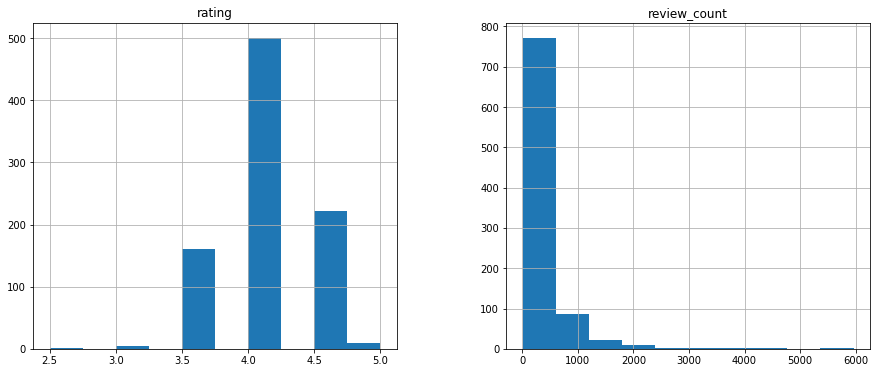

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.hist(figsize=(15,6))

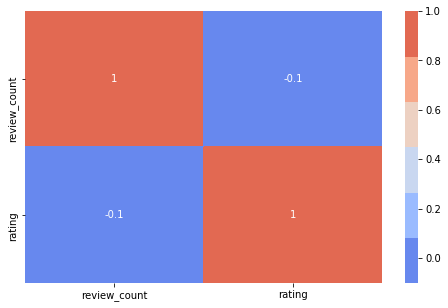

In [58]:
import seaborn as sns
corr = df2.corr() 
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

In [60]:
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'rating'
x_cols = df2.drop(['rating', 'coordinates'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.924
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           2.81e-06
Time:                        21:23:25   Log-Likelihood:                -317.95
No. Observations:                 897   AIC:                             645.9
Df Residuals:                     892   BIC:                             669.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3048      0.055     78.273      0.000       4.197       4.413
prices[T.2]     -0.2485      0.056     -4.405      0.000      -0.359      -0.138
prices[T.3]     -0.2778      0.060     -4.631      0.000      -0.395      -0.160
prices[T.4]     -0.1978      0.101     -1.964      0.050      -0.395      -0.000
review_count -6.972e-05   2.35e-05     -2.962      0.003      -0.000   -2.35e-05
==============================================================================
Omnibus:                        6.428   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.362
Skew:                          -0.180   Prob(JB):                       0.0415
Kurtosis:                       3.201   Cond. No.                     6.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

QA: Price and number of reviews have almost no impact on restaurant rating. Few restaurants in our inital data set are rated below a 3. ~82-83% of restaurants are rated a 4.0 or 4.5. 70%+ of restaurants are priced at $$. Brooklyn NY enjoys moderately priced Italian food.

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [75]:
# Your code here
keys = df2.coordinates.iloc[0]

new_cols = []

for key in keys:
    new_col = '{}_coord'.format(key)
    df2[new_col] = df2.coordinates.map(lambda x: x[key])
    new_cols.append(new_col)

df2 = df2.drop(['coordinates'], axis=1)
df2.head()

,review_count,rating,prices,latitude_coord,longitude_coord
name,,,,,
Lillo Cucina Italiana,108,5.0,2,40.690230,-73.996340
Aita Trattoria,168,4.0,2,40.671210,-73.957926
Camillo,118,4.0,2,40.659600,-73.950810
Scottadito Osteria Toscana,834,4.0,2,40.674663,-73.976613
Ammazzacaffè,140,4.5,2,40.711317,-73.944624


In [82]:
map_lat = response.json()['region']['center']['latitude']
map_long = response.json()['region']['center']['longitude']

In [61]:
import folium

In [89]:
base_map = folium.Map([map_lat, map_long], zoom_start=10)
base_map

In [90]:
x = [i for i in df2.latitude_coord]
y = [i for i in df2.longitude_coord]
z = [i for i in df2.index]

points = list(zip(x,y,z))
for p in points:
    lat = p[0]
    long = p[1]
    rest_name = p[2]
    marker = folium.Marker(location=[lat, long], popup=rest_name)
    marker.add_to(base_map)
base_map

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!